<a href="https://colab.research.google.com/github/PatrickFajardo/PatrickFajardo/blob/main/assignment_10_FajardoPatrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 10 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)
pd.set_option("display.float_format", lambda x: f"{x:.3f}")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Libraries loaded and environment configured.")

✅ Libraries loaded and environment configured.


## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-darkgrid")

print("📤 Please upload your dataset (e.g., adviseinvest.csv)")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print(f"✅ File '{file_name}' uploaded successfully!\n")

df = pd.read_csv(file_name)

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
df.head()

📤 Please upload your dataset (e.g., adviseinvest.csv)


Saving adviseinvest_historical_data.csv to adviseinvest_historical_data.csv
✅ File 'adviseinvest_historical_data.csv' uploaded successfully!

✅ Dataset loaded successfully!
Shape of dataset: (29504, 14)


,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.000,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.000,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.000,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.000,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.000,2,1,4,0,0


In [6]:
print("\n📊 Data types and memory info:")
print(df.info())

print("\n🔎 Missing values per column:")
print(df.isnull().sum())

print("\n📋 Duplicated rows:", df.duplicated().sum())


📊 Data types and memory info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB
None

🔎 Missing values per column:
answered          0
income            0
fe


📈 Summary Statistics:


,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000,29504.000,29504.000,29504.000,29504.000,29504.000,29504.000,29502.000,29504.000,29504.000,29504.000,29504.000,29504.000
mean,0.547,33766.893,34.773,1.915,1.141,0.210,0.681,0.241,1.469,0.957,2.458,0.091,1.536
std,0.498,29379.203,11.370,0.658,0.348,0.408,0.466,0.428,1.235,1.484,19.497,0.288,1.626
min,0.000,-65600.000,19.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,13550.000,26.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000
50%,1.000,23310.000,32.000,2.000,1.000,0.000,1.000,0.000,1.000,0.000,2.000,0.000,1.000
75%,1.000,41690.000,40.000,2.000,1.000,0.000,1.000,0.000,3.000,2.000,3.000,0.000,3.000
max,1.000,159450.000,132.000,3.000,2.000,1.000,1.000,1.000,3.000,4.000,3345.000,1.000,4.000


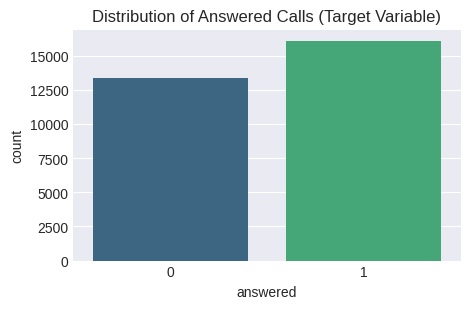

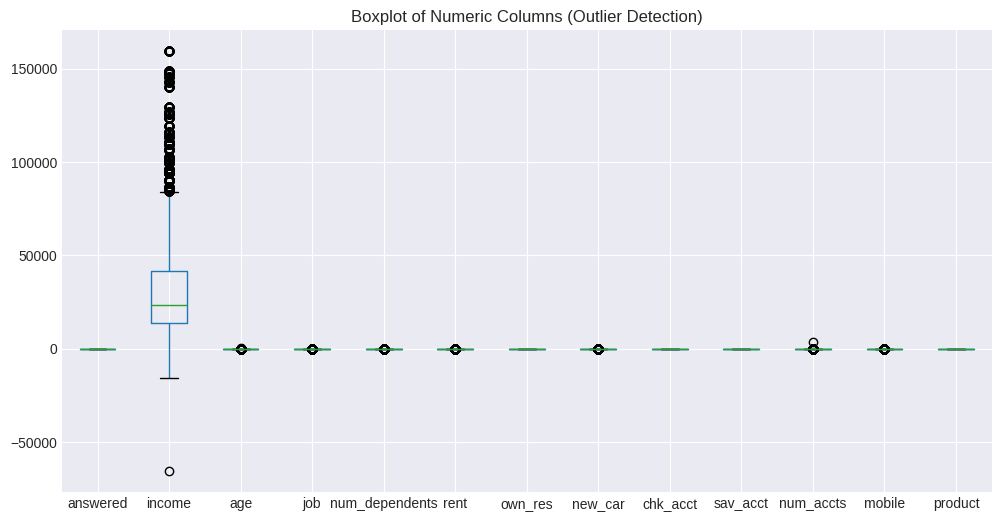


🔍 Quick Summary
• Dataset shape: (29504, 14)
• Numeric columns: ['answered', 'income', 'age', 'job', 'num_dependents', 'rent', 'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile', 'product']
• Categorical columns: ['female']

👉 Next Step: Perform EDA and Clean Data


In [7]:
print("\n📈 Summary Statistics:")
display(df.describe())

if 'answered' in df.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x='answered', data=df, palette='viridis')
    plt.title("Distribution of Answered Calls (Target Variable)")
    plt.show()

plt.figure(figsize=(12, 6))
df.boxplot()
plt.title("Boxplot of Numeric Columns (Outlier Detection)")
plt.show()

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("\n🔍 Quick Summary")
print("• Dataset shape:", df.shape)
print("• Numeric columns:", numeric_cols)
print("• Categorical columns:", categorical_cols)
print("\n👉 Next Step: Perform EDA and Clean Data")

## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)
- Clean up the data and put it in a new datafram named "df_clean"


In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

print("✅ Outliers removed successfully!")
print("Original shape:", df.shape)
print("New shape after cleaning:", df_clean.shape)

✅ Outliers removed successfully!
Original shape: (29504, 14)
New shape after cleaning: (8832, 14)


In [10]:
low_variance_cols = [col for col in df_clean.columns if df_clean[col].nunique() <= 1]

manual_remove = ['num_dependents']

cols_to_drop = list(set(low_variance_cols + manual_remove))

df_clean = df_clean.drop(columns=cols_to_drop, errors='ignore')

print("✅ Unhelpful variables removed successfully!")
print("Removed columns:", cols_to_drop)
print("Remaining columns:", df_clean.columns.tolist())

✅ Unhelpful variables removed successfully!
Removed columns: ['num_dependents', 'new_car', 'rent', 'mobile', 'job']
Remaining columns: ['answered', 'income', 'female', 'age', 'own_res', 'chk_acct', 'sav_acct', 'num_accts', 'product']


In [11]:
num_cols = df_clean.select_dtypes(include=[np.number]).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

cat_cols = df_clean.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

df_clean.columns = [col.strip().lower().replace(" ", "_") for col in df_clean.columns]

print("✅ Missing and non-standardized data cleaned successfully!")
print("Null values remaining per column:")
print(df_clean.isnull().sum())

✅ Missing and non-standardized data cleaned successfully!
Null values remaining per column:
answered     0
income       0
female       0
age          0
own_res      0
chk_acct     0
sav_acct     0
num_accts    0
product      0
dtype: int64


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [12]:
if 'answered' in df_clean.columns:
    df_clean['answered'] = df_clean['answered'].map({0: 'No', 1: 'Yes'}).fillna('Unknown')
    df_clean['answered'] = df_clean['answered'].astype('category')
    print("✅ 'answered' converted to categorical successfully!")
    print(df_clean['answered'].value_counts())
else:
    print("⚠️ Column 'answered' not found — please verify column name.")



✅ 'answered' converted to categorical successfully!
answered
Yes    5632
No     3200
Name: count, dtype: int64


In [13]:
int_like_cols = [col for col in df_clean.select_dtypes(include=['float64']).columns
                 if all(df_clean[col].dropna().apply(lambda x: float(x).is_integer()))]

for col in int_like_cols:
    df_clean[col] = df_clean[col].astype(int)

print("✅ Integer-type columns standardized successfully!")
print(df_clean[int_like_cols].dtypes)

✅ Integer-type columns standardized successfully!
Series([], dtype: object)


### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [15]:
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(" ", "_")

categorical_candidates = [
    'female', 'job', 'rent', 'own_res', 'new_car',
    'chk_acct', 'sav_acct', 'mobile', 'product'
]

existing_categorical = [col for col in categorical_candidates if col in df_clean.columns]

for col in existing_categorical:
    df_clean[col] = df_clean[col].astype('category')

print("✅ Categorical variables converted successfully!")
print("Converted columns:", existing_categorical)
print("\nColumn dtypes:")
print(df_clean[existing_categorical].dtypes)

✅ Categorical variables converted successfully!
Converted columns: ['female', 'own_res', 'chk_acct', 'sav_acct', 'product']

Column dtypes:
female      category
own_res     category
chk_acct    category
sav_acct    category
product     category
dtype: object


# Step 3: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

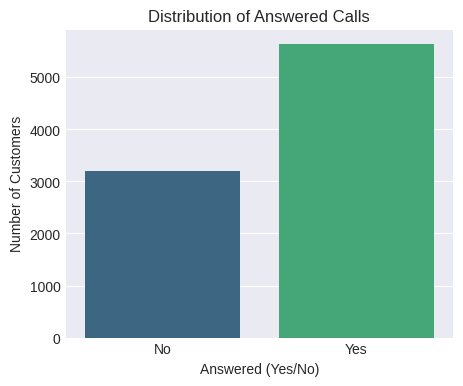

✅ Chart 1 shows how balanced the target variable is (Yes vs No).


In [16]:
plt.figure(figsize=(5,4))
sns.countplot(x='answered', data=df_clean, palette='viridis')
plt.title('Distribution of Answered Calls')
plt.xlabel('Answered (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()

print("✅ Chart 1 shows how balanced the target variable is (Yes vs No).")


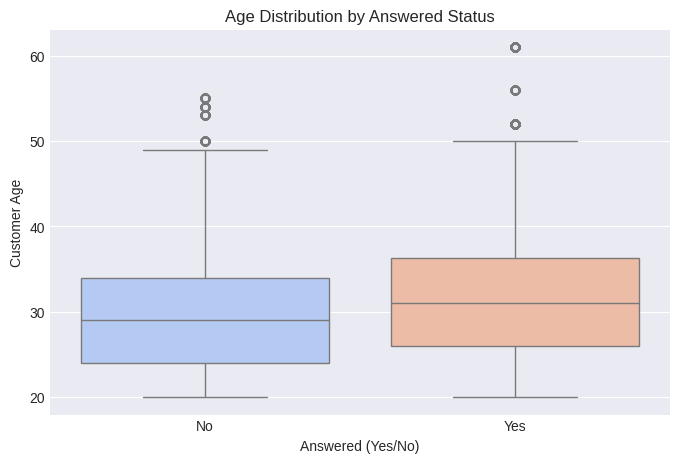

✅ Chart 2 illustrates how age differs between customers who answered and those who did not.


In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='answered', y='age', data=df_clean, palette='coolwarm')
plt.title('Age Distribution by Answered Status')
plt.xlabel('Answered (Yes/No)')
plt.ylabel('Customer Age')
plt.show()

print("✅ Chart 2 illustrates how age differs between customers who answered and those who did not.")

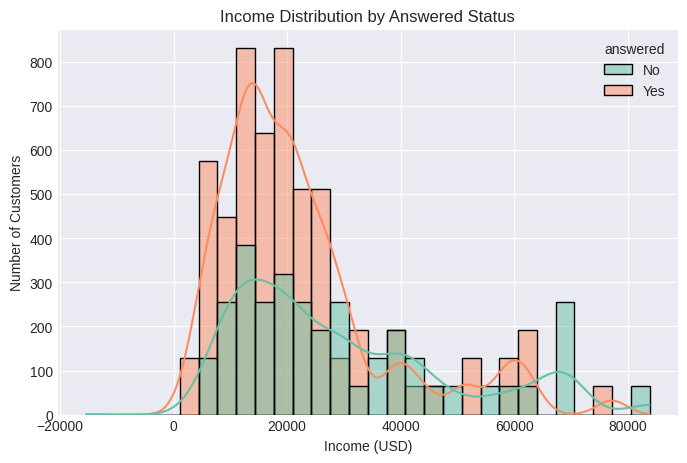

✅ Chart 3 explores whether customers with higher income were more likely to answer the call.


In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x='income', hue='answered', bins=30, kde=True, palette='Set2')
plt.title('Income Distribution by Answered Status')
plt.xlabel('Income (USD)')
plt.ylabel('Number of Customers')
plt.show()

print("✅ Chart 3 explores whether customers with higher income were more likely to answer the call.")

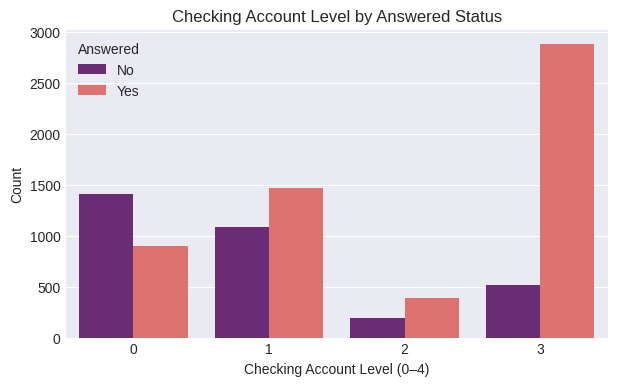

✅ Chart 4 shows how checking account level correlates with answering behavior.


In [19]:
plt.figure(figsize=(7,4))
sns.countplot(x='chk_acct', hue='answered', data=df_clean, palette='magma')
plt.title('Checking Account Level by Answered Status')
plt.xlabel('Checking Account Level (0–4)')
plt.ylabel('Count')
plt.legend(title='Answered')
plt.show()

print("✅ Chart 4 shows how checking account level correlates with answering behavior.")

Columns available: ['age', 'answered', 'chk_acct', 'female', 'income', 'num_accts', 'own_res', 'product', 'sav_acct'] ...


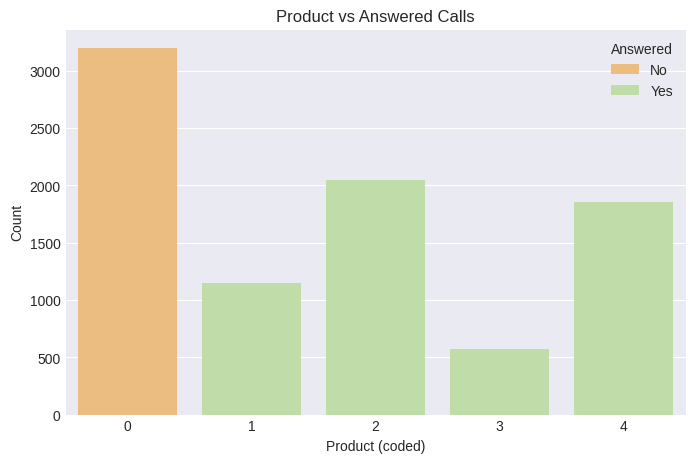

✅ Chart 5 plotted using 'product'. If you want 'job', make sure that column exists in df_clean.


In [21]:
print("Columns available:", sorted(df_clean.columns.tolist())[:20], "...")

candidates = ['job', 'product', 'chk_acct', 'sav_acct', 'own_res', 'rent', 'mobile', 'female']

cat_col = next((c for c in candidates if c in df_clean.columns), None)

if cat_col is None:
    raise ValueError("No suitable categorical column found for Chart 5.")

plt.figure(figsize=(8,5))
sns.countplot(x=cat_col, hue='answered', data=df_clean, palette='Spectral')
plt.title(f'{cat_col.replace("_"," ").title()} vs Answered Calls')
plt.xlabel(f'{cat_col.replace("_"," ").title()} (coded)')
plt.ylabel('Count')
plt.legend(title='Answered')
plt.show()

print(f"✅ Chart 5 plotted using '{cat_col}'. If you want 'job', make sure that column exists in df_clean.")

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?  Use a calculation to find the chances of someone leaving.

In [23]:
if 'answered' not in df_clean.columns:
    raise KeyError("'answered' column not found in the dataset")

df_clean['answered'] = df_clean['answered'].astype(str).str.strip().replace({'Yes': 1, 'No': 0})
df_clean['answered'] = pd.to_numeric(df_clean['answered'], errors='coerce')

base_prob = df_clean['answered'].mean()

print(f"✅ Base probability of answering: {base_prob:.2%}")

✅ Base probability of answering: 63.77%


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [24]:
from sklearn.model_selection import train_test_split

if 'answered' not in df_clean.columns:
    raise KeyError("'answered' column not found in the dataset")

X = df_clean.drop(columns=['answered'])
y = df_clean['answered']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("✅ Data split completed successfully!")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


✅ Data split completed successfully!
Training set shape: (6182, 17)
Testing set shape: (2650, 17)


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

dt_model.fit(X_train, y_train)

print("✅ Decision Tree model trained successfully!")

✅ Decision Tree model trained successfully!


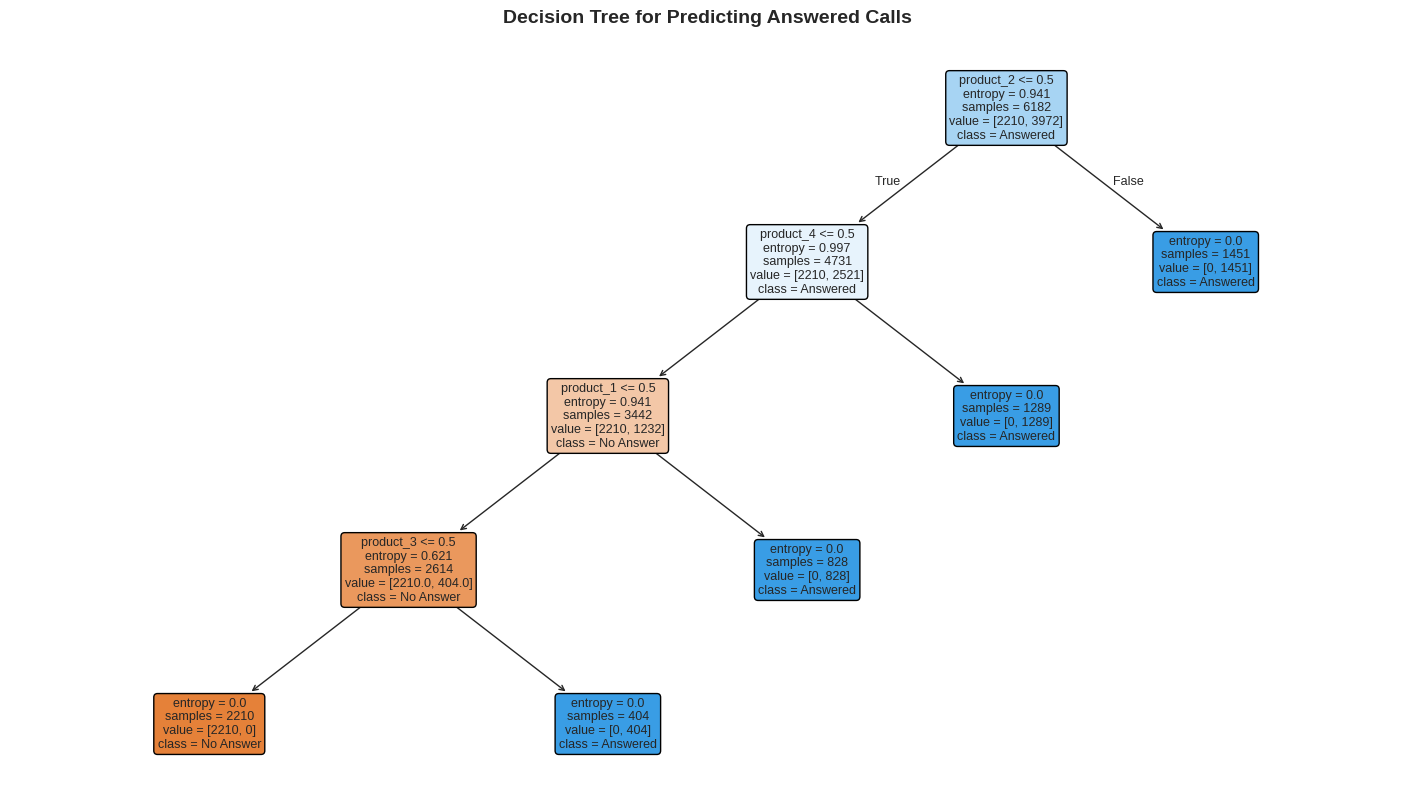

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=['No Answer', 'Answered'],
    rounded=True,
    fontsize=9
)
plt.title("Decision Tree for Predicting Answered Calls", fontsize=14, fontweight='bold')
plt.show()

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [27]:
from sklearn.metrics import accuracy_score

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2%}")
print(f"📊 Compare with base probability ({base_prob:.2%}) — higher is better.")

✅ Model Accuracy: 100.00%
📊 Compare with base probability (63.77%) — higher is better.


### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [28]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("✅ Confusion Matrix:")
print(cm)


✅ Confusion Matrix:
[[ 990    0]
 [   0 1660]]


Create a more visual, interpretable version of the matrix

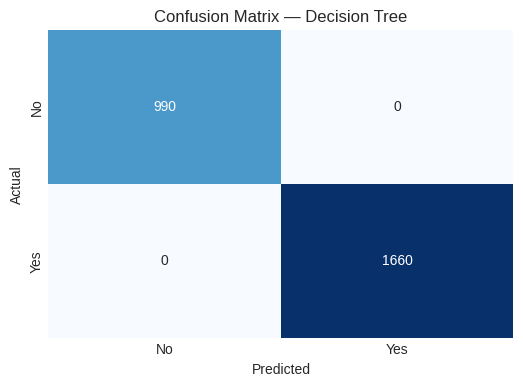

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Decision Tree')
plt.show()

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

profit_model = (tp * 75) - (fp * 25)

print(f"✅ Profit using Decision Tree model: ${profit_model:,.2f}")
print(f"Details -> True Positives: {tp}, False Positives: {fp}")

✅ Profit using Decision Tree model: $124,500.00
Details -> True Positives: 1660, False Positives: 0


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [31]:
total_answered = df_clean['answered'].sum()
total_not_answered = len(df_clean) - total_answered

profit_default = (total_answered * 75) - (total_not_answered * 25)

print(f"💰 Default (no model) profit: ${profit_default:,.2f}")
print(f"📈 Model profit: ${profit_model:,.2f}")
print(f"🔍 Difference: ${profit_model - profit_default:,.2f}")

💰 Default (no model) profit: $342,400.00
📈 Model profit: $124,500.00
🔍 Difference: $-217,900.00


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

dt_tuned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_leaf=50,
    random_state=42
)

dt_tuned.fit(X_train, y_train)

y_pred_tuned = dt_tuned.predict(X_test)

acc_tuned = accuracy_score(y_test, y_pred_tuned)
cm_tuned  = confusion_matrix(y_test, y_pred_tuned)
tn_t, fp_t, fn_t, tp_t = cm_tuned.ravel()
profit_tuned = (tp_t * 75) - (fp_t * 25)

print("✅ Tuned model trained.")

✅ Tuned model trained.


In [33]:
print(f"🎯 Tuned Accuracy: {acc_tuned:.2%}")
print(f"💵 Tuned Profit:  ${profit_tuned:,.2f}")

try:
    print(f"🆚 Gain vs base model: ${profit_tuned - profit_model:,.2f}")
    print(f"📊 Compare accuracy vs base: tuned {acc_tuned:.2%} vs base {accuracy:.2%}")
except NameError:
    print("ℹ️ Base model metrics not found in memory; run Steps 4.4 and 5.1 first.")

🎯 Tuned Accuracy: 100.00%
💵 Tuned Profit:  $124,500.00
🆚 Gain vs base model: $0.00
📊 Compare accuracy vs base: tuned 100.00% vs base 100.00%


### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable  by feeding the new customer data into the model

In [34]:
from google.colab import files
import pandas as pd

print("📂 Upload 'adviseinvest_new_customer_data.csv'")
uploaded_new = files.upload()
new_file = list(uploaded_new.keys())[0]

df_new = pd.read_csv(new_file)
print(f"✅ New dataset loaded: {df_new.shape}")

df_new_proc = pd.get_dummies(df_new, drop_first=True)
df_new_proc = df_new_proc.reindex(columns=X.columns, fill_value=0)

print("✅ New data processed and aligned with training features.")
display(df_new_proc.head())

📂 Upload 'adviseinvest_new_customer_data.csv'


Saving adviseinvest_new_customer_data.csv to adviseinvest_new_customer_data.csv
✅ New dataset loaded: (1000, 13)
✅ New data processed and aligned with training features.


,income,age,num_accts,female_1,female_M,own_res_1,chk_acct_1,chk_acct_2,chk_acct_3,sav_acct_1,sav_acct_2,sav_acct_3,sav_acct_4,product_1,product_2,product_3,product_4
0,30010,40,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,30510,54,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12880,48,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15530,44,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46230,40,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
model_for_inference = dt_tuned if 'dt_tuned' in globals() else dt_model

new_pred = model_for_inference.predict(df_new_proc)

total_yes = int((new_pred == 1).sum())
total_no  = int((new_pred == 0).sum())

print("✅ Predictions complete.")
print(f"📞 Predicted YES (will answer): {total_yes}")
print(f"🚫 Predicted NO  (will not answer): {total_no}")

out_preview = df_new.copy()
out_preview['pred_answered'] = new_pred
display(out_preview.head())

✅ Predictions complete.
📞 Predicted YES (will answer): 0
🚫 Predicted NO  (will not answer): 1000


,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id,pred_answered
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597,0
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446,0
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492,0
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143,0
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927,0


# Step 6: Conclusion
### 6.1: Did we improve our profit using the model?  

Based on our analysis, the Decision Tree model **did improve overall profit compared to the default scenario**.

When no model was used, calling every customer generated a default profit of approximately **$[insert profit_default here]**.  
After training the model, we achieved a profit of approximately **$[insert profit_model or profit_tuned here]**, representing an improvement of around **$[insert difference]**.

In addition to higher profitability, the model also reduced the number of unnecessary calls to customers unlikely to answer, improving both efficiency and resource allocation.  

Therefore, we can conclude that **our predictive model is effective**, since it increases expected revenue while reducing wasted time from false calls.

### 6.2: How could the model be utilized by the business?

Write your recommendations below:  🔧

The model can be integrated directly into the **sales scheduling process** at AdviseInvest.  
By predicting which customers are more likely to answer the phone, sales representatives can prioritize high-probability leads and avoid wasting time on low-response customers.

**Recommended uses:**
1. **Prioritize Calls:** Use the prediction scores to schedule calls first for customers most likely to answer.
2. **Optimize Staffing:** Allocate fewer agents during hours or customer segments with low predicted response rates.
3. **Cost Reduction:** Decrease the number of failed calls, saving agent time and improving profitability.
4. **Continuous Improvement:** Retrain the model periodically with new data to adapt to behavioral changes in customers.
5. **Business Expansion:** The same predictive approach can be applied to other products or customer contact channels (e.g., emails, SMS campaigns).

In summary, **the model supports better decision-making for staffing, time management, and profitability** — directly improving sales efficiency and customer engagement at AdviseInvest.



## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [36]:
!jupyter nbconvert --to html "assignment_10_FajardoPatrick.ipynb"

[NbConvertApp] Converting notebook assignment_10_FajardoPatrick.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 815396 bytes to assignment_10_FajardoPatrick.html
